In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')
df = df[~df['구매시월령(수정)'].isna()]
df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,3단계,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199510,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00
199513,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00


In [3]:
df_grouped = df.groupby('구매일', as_index=False)['할인율'].mean()
df_grouped['구매량'] = df.groupby('구매일')['주문번호'].count().values
df_grouped

,구매일,할인율,구매량
0,2019-01-01,0.323830,47
1,2019-01-02,0.301778,45
2,2019-01-03,0.356154,65
3,2019-01-04,0.271951,41
4,2019-01-05,0.318947,57
...,...,...,...
576,2020-08-03,0.249133,180
577,2020-08-04,0.276047,174
578,2020-08-05,0.270659,171
579,2020-08-06,0.229114,163


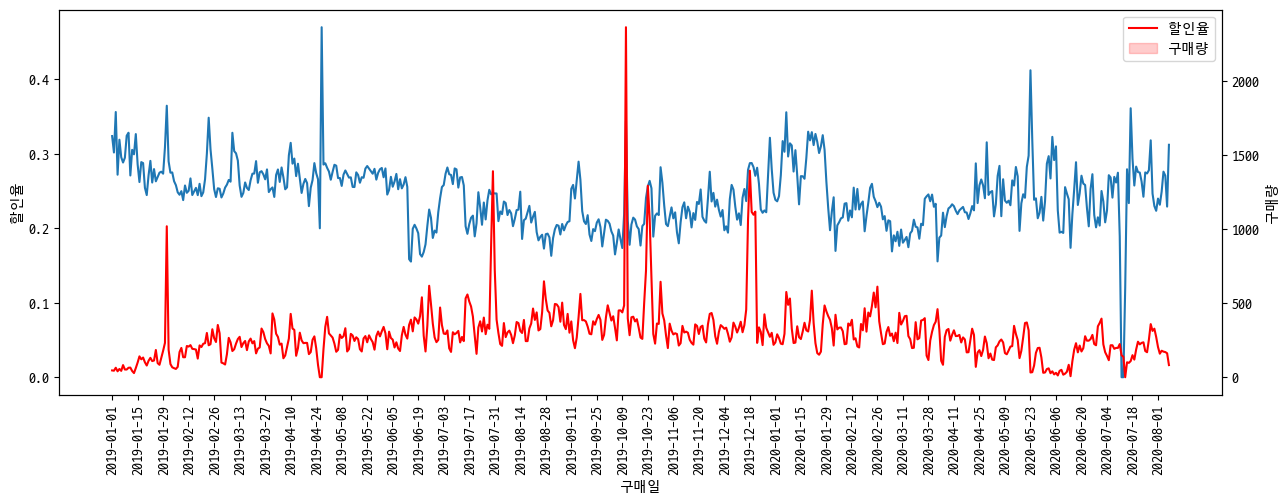

In [4]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='구매일', y='할인율')
plt.xticks(df_grouped['구매일'][::14].values, rotation=90)

ax2 = plt.twinx()
sns.lineplot(data=df_grouped, x='구매일', y='구매량', ax=ax2, color='red')

plt.legend(['할인율', '구매량'])
plt.show()

In [5]:
df_grouped = df.groupby('구매일', as_index=False)['구매금액', '결제금액'].sum()
df_grouped['할인율'] = 1 - (df_grouped['결제금액'] / df_grouped['구매금액'])
df_grouped['구매량'] = df.groupby('구매일')['주문번호'].count().values
df_grouped

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_37399/3851729368.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df.groupby('구매일', as_index=False)['구매금액', '결제금액'].sum()


,구매일,구매금액,결제금액,할인율,구매량
0,2019-01-01,1795510,1245706,0.306210,47
1,2019-01-02,1566280,1072710,0.315122,45
2,2019-01-03,2015440,1350052,0.330145,65
3,2019-01-04,1381410,1023317,0.259223,41
4,2019-01-05,2017650,1383772,0.314166,57
...,...,...,...,...,...
576,2020-08-03,5890780,3850228,0.346398,180
577,2020-08-04,5958840,3785050,0.364801,174
578,2020-08-05,6157420,3911836,0.364696,171
579,2020-08-06,4976610,3101736,0.376737,163


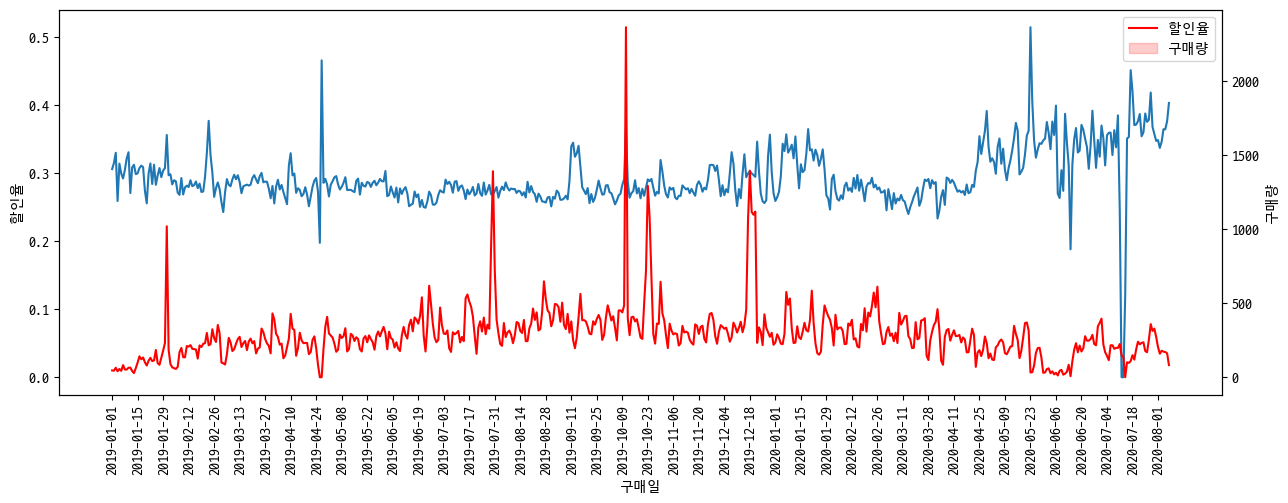

In [6]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='구매일', y='할인율')
plt.xticks(df_grouped['구매일'][::14].values, rotation=90)

ax2 = plt.twinx()
sns.lineplot(data=df_grouped, x='구매일', y='구매량', ax=ax2, color='red')

plt.legend(['할인율', '구매량'])
plt.show()

# 가입일자

In [9]:
df['가입일자'] = df['고객번호'].apply(lambda x: str(x)[:8])
df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,가입일자
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,20181231
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,20181231
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,20181231
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,20181231
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,3단계,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,20181231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199510,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,20191228
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,20191228
199513,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,20191228
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,20191228


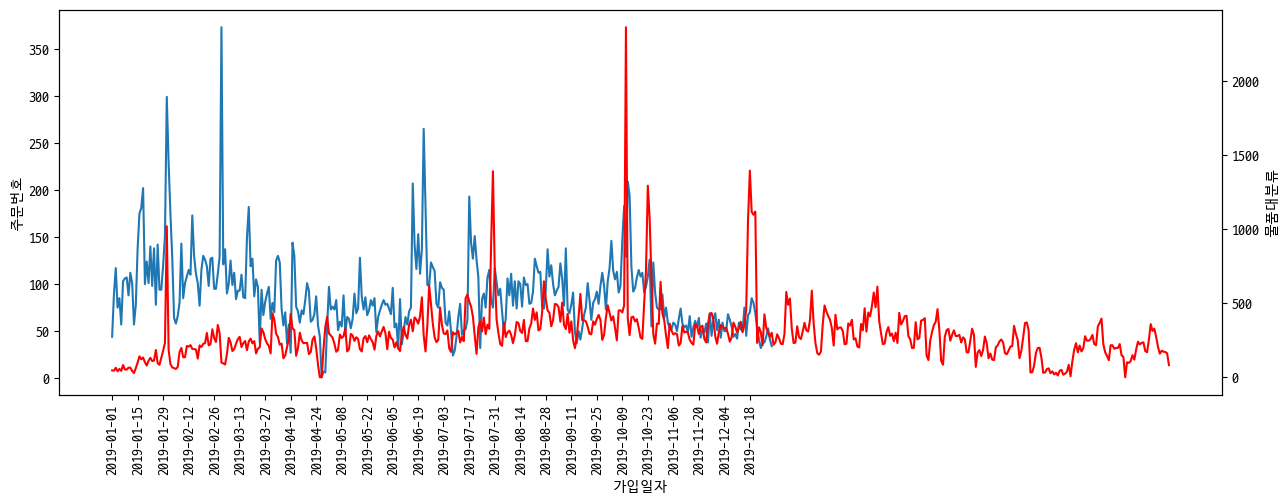

In [39]:
# 이벤트 판매량
df_grouped = df[df['물품대분류'] == '이벤트'].groupby('가입일자').count().iloc[:,0].reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='가입일자', y='주문번호')
plt.xticks(df_grouped['가입일자'][::14].values, rotation=90)

# 신규유입량
df_grouped = df.groupby('구매일', as_index=False)['물품대분류'].count()
ax2 = plt.twinx()
sns.lineplot(data=df_grouped, x='구매일', y='물품대분류', ax=ax2, color='red')

plt.show()